# Introduction to Scikit-Learn (sklearn)

This notebook will introduce you to the scikit-learn library, which is a Python library for machine learning.

What we're going to cover:

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluate the model/algorithm
5. Improve the model/algorithm
6. Save and load a trained model
7. Putting all together


## 0. An end-to-end Scikit-Learn workflow

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Create X (features matrix)
X = heart_disease.drop(["target"], axis=1)

# Create y (labels)
y = heart_disease["target"]

In [4]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
clf.fit(X_train, y_train);

In [7]:
# Make a prediction
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [8]:
y_test

270    0
93     1
104    1
149    1
295    0
      ..
59     1
264    0
234    0
33     1
233    0
Name: target, Length: 61, dtype: int64

In [9]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [10]:
clf.score(X_test, y_test)

0.819672131147541

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81        29
           1       0.82      0.84      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [12]:
print(confusion_matrix(y_test, y_preds))

[[23  6]
 [ 5 27]]


In [13]:
print(accuracy_score(y_test, y_preds))

0.819672131147541


In [14]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range (10, 100, 10):
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

0.8524590163934426
0.8360655737704918
0.7377049180327869
0.7540983606557377
0.7868852459016393
0.819672131147541
0.7868852459016393
0.7868852459016393
0.8360655737704918


In [15]:
# 6. Save the model and load it
import pickle

pickle.dump(clf, open("random_forest_model.pkl", "wb"))

In [16]:
loaded_model = pickle.load(open("random_forest_model.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8360655737704918

## 1. Getting the data ready to be used with machine learning

Three main things we have todo:
1.  Split the data into features and labels (usually `X` and `y`)
2.  Filling (also called imputing) or disregarding missing values
3.  Converting non-numerical data to numerical data (also called feature encoding)

In [17]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
X = heart_disease.drop(["target"], axis=1)

In [19]:
y = heart_disease["target"]

In [20]:
# Split data in train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure it's all numerical

In [22]:
car_sales = pd.read_csv('../data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [23]:
len(car_sales)

1000

In [24]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [25]:
# Split the data
X = car_sales.drop(["Price"], axis=1)
y = car_sales["Price"]

# Split into trainning and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)


In [27]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(X)


In [28]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [29]:
dummies = pd.get_dummies(car_sales, columns=categorical_features)
dummies.head()

,Odometer (KM),Price,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Doors_3,Doors_4,Doors_5
0,35431,15323,0,1,0,0,0,0,0,0,1,0,1,0
1,192714,19943,1,0,0,0,0,1,0,0,0,0,0,1
2,84714,28343,0,1,0,0,0,0,0,0,1,0,1,0
3,154365,13434,0,0,0,1,0,0,0,0,1,0,1,0
4,181577,14043,0,0,1,0,0,1,0,0,0,1,0,0


In [30]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation)
2. Drop the samples with missing data altogether

In [31]:
# Import car sales missing data
car_sales_missing = pd.read_csv('../data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [32]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [33]:
# Create X and y
X = car_sales_missing.drop(["Price"], axis=1)
y = car_sales_missing["Price"]

In [34]:
# Let's try and convert our data to numbers
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(X)

In [35]:
# No hay errores porque ahora el OneHotEncoder no peta con valores nulos

### Option 1: Fill missing data with Pandas

In [36]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [37]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [38]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [39]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [40]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [41]:
# Create X and y
X = car_sales_missing.drop(["Price"], axis=1)
y = car_sales_missing["Price"]

In [42]:
# Let's try and convert our data to numbers
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(X)

### Option 2: Fill missing data with Scikit-Learn

In [43]:
car_sales_missing = pd.read_csv('../data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [44]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [45]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()


Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [46]:
# Split into X and y
X = car_sales_missing.drop(["Price"], axis=1)
y = car_sales_missing["Price"]

In [47]:
# Create train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
# Fill misssing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Fill the data
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

filled_X_train



array([['Toyota', 'Black', 4.0, 86696.0],
       ['Toyota', 'Black', 4.0, 20714.0],
       ['Toyota', 'White', 4.0, 134415.0],
       ...,
       ['Honda', 'Blue', 4.0, 224900.0],
       ['missing', 'White', 3.0, 19482.0],
       ['Honda', 'Blue', 4.0, 199833.0]], dtype=object)

In [49]:
# Es un array de numpy, lo convierto a pandas
car_sales_X_train = pd.DataFrame(filled_X_train, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_X_train.head()

,Make,Colour,Doors,Odometer (KM)
0,Toyota,Black,4.0,86696.0
1,Toyota,Black,4.0,20714.0
2,Toyota,White,4.0,134415.0
3,Toyota,Green,4.0,130710.230137
4,Honda,White,4.0,145850.0


In [50]:
car_sales_X_test = pd.DataFrame(filled_X_test, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_X_test.head()

,Make,Colour,Doors,Odometer (KM)
0,Toyota,Red,4.0,133195.0
1,BMW,White,5.0,37513.0
2,Toyota,White,4.0,28809.0
3,Nissan,White,4.0,82429.0
4,Nissan,White,4.0,234161.0


In [51]:
print(car_sales_X_train.isna().sum())
print(car_sales_X_test.isna().sum())

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64
Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64


In [52]:
# Let's try and convert our data to numbers
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X_train = transformer.fit_transform(car_sales_X_train)  
transformed_X_test = transformer.transform(car_sales_X_test)

In [53]:
# Now we've got our data as numbers and filled (no missing values)
model = RandomForestRegressor(n_estimators=100)
model.fit(transformed_X_train, y_train)

RandomForestRegressor()

In [54]:
model.score(transformed_X_test, y_test)

0.10175069616245203

## 2. Choosing the right estimator/algorithm for your problems

Some things to note:
* Sklearn refers to machine learning model, algoriths as estimators.
* Classification problem - prediction a category (heart disease or not)
    * Sometimes you'll see `clf`(short for classifier) used as a classification estimator
* Regression problem - prediction a value (price of a house)

If you're working on a machine learning problem and looking to use Sklearn and not sure what model you should use,
refer to the sklearn machine learning map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


### 2.1 Picking a machine larning model for a regression problem

Let's use the californa housing dataset

In [55]:
# Get the california housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [56]:
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [57]:
# Let's add the taget column
housing_df["target"] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [58]:
# Import algorithm/estimator
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop(["target"], axis=1)
y = housing_df["target"] # median house price in $100,000s

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.5758549611440125

What if `Ridge` didn't work on the score or the score didn't fit our needs?

Well, we could always try a different model

How about we try an ensemble model (an ensembole is a combination of smaller models to try and make better predictions than a single model)?

Sklearn's ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html

In [59]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8051230593157366

## 2.2 Picking a machine learning model for a classification problem

In [60]:
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [61]:
len(heart_disease)

303

In [62]:
# Consulting the map it says to tray LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model
clf = LinearSVC(max_iter=100000)
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

/home/nicolas/Develop/Trainning/ZTM/ML-DS/sample_project/env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8852459016393442

In [63]:
# Try RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)


0.8360655737704918

Tidbit:
1. If you have structured data, used ensemble methods
2. If you have unstructured data, use deeplearning or transfer learning

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

* `X`  = features, features variables, data
* `y` = labels, targets, target variables

In [64]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8360655737704918

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:
1. `predict()`: make predictions on new data
2. `predict_proba()`: make predictions on new data, but also return the probability of each class

In [65]:
# Use a trained model to make predictions
clf.predict(X_test.iloc[0:1])

array([0])

In [66]:
y_test[0:1]

179    0
Name: target, dtype: int64

In [67]:
clf.predict(X_test)


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [68]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [69]:
# compare prediction with actual
np.array(y_test) == clf.predict(X_test)

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True, False, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [70]:
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8360655737704918

In [71]:
from sklearn.metrics import accuracy_score

accuracy_score = accuracy_score(y_test, y_preds)
accuracy_score

0.8360655737704918

In [72]:
# Make predictions with predict_proba()
clf.predict_proba(X_test.iloc[0:5])

array([[0.95, 0.05],
       [0.38, 0.62],
       [0.45, 0.55],
       [0.86, 0.14],
       [0.21, 0.79]])

In [73]:
# Let's predict() on the same data...
clf.predict(X_test.iloc[0:5])

array([0, 1, 1, 0, 1])

In [74]:
np.array(y_test[0:5])

array([0, 0, 1, 0, 1])

`predict()` can also be used for regression models

In [75]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [76]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)


In [77]:
y_preds[0:5]

array([0.5095   , 0.74161  , 4.9232571, 2.52961  , 2.27369  ])

In [78]:
np.array(y_test[0:5])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   ])

In [79]:
# Compare the predictions to the truth
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_preds)

0.2553684927247781

## 4. Evaluate a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator's built-in score function `score()`
2. The `scoring` parameter
3. Problem-specific metrics functions

You can read more about here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating model with the `score()` method

In [80]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Create train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit classifier to training data
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [81]:
# The highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(X_train, y_train)

1.0

In [82]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [83]:
clf.score(X_test, y_test)

0.8360655737704918

Let's use the `score()` method to evaluate our model.

In [84]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8051230593157366

### 4.2 Evaluating model with the `scoring` parameter

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Create train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit classifier to training data
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [86]:
clf.score(X_test, y_test)

0.8360655737704918

In [87]:
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.8852459 , 0.83606557, 0.85      , 0.8       ])

In [88]:
cross_val_score(clf, X, y, cv=10)

array([0.80645161, 0.83870968, 0.83870968, 0.9       , 0.9       ,
       0.83333333, 0.73333333, 0.83333333, 0.76666667, 0.86666667])

In [89]:
# Single train/test split
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5 -fold cross-validation scores
clf_cross_val_score = cross_val_score(clf, X, y, cv=5).mean()

# Compare the two
clf_single_score, clf_cross_val_score

(0.8360655737704918, 0.8381967213114756)

In [90]:
# Default scoring parameter of classifier = mean accuracy
clf.score(X_test, y_test)   

0.8360655737704918

In [91]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.81967213, 0.8852459 , 0.83606557, 0.85      , 0.8       ])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

#### Accuracy

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop(['target'], axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()

cross_val_score = cross_val_score(clf, X, y, cv=5)


In [93]:
np.mean(cross_val_score)

0.8248087431693989

In [94]:
print(f"Heart Disease Classifier Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Accuracy: 82.48%


#### Area under the receiver operating characteristic curve (AUC)
* Area under curve (AUC)
* ROC curve
ROC curves are a comparison of a model's true positive rate (TPR) and false positive rate (FPR) against the threshold of the decision boundary.

* True positive = model predicts 1 when the actual value is 1
* False positive = model predicts 1 when the actual value is 0
* True negative = model predicts 0 when the actual value is 0
* False negative = model predicts 0 when the actual value is 1

In [95]:
from sklearn.metrics import roc_curve

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_pred_probs = clf.predict_proba(X_test)

y_pred_probs[:10]

array([[0.87, 0.13],
       [0.41, 0.59],
       [0.45, 0.55],
       [0.89, 0.11],
       [0.19, 0.81],
       [0.14, 0.86],
       [0.4 , 0.6 ],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.43, 0.57]])

In [96]:
# Solo la segunda columna que es la de valor positivo
y_pred_probs_positive = y_pred_probs[:, 1]
y_pred_probs_positive[:10]

array([0.13, 0.59, 0.55, 0.11, 0.81, 0.86, 0.6 , 0.04, 0.  , 0.57])

In [97]:
# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.13793103, 0.13793103, 0.17241379, 0.17241379,
       0.17241379, 0.17241379, 0.20689655, 0.20689655, 0.24137931,
       0.34482759, 0.4137931 , 0.51724138, 0.5862069 , 0.65517241,
       0.65517241, 0.72413793, 0.82758621, 0.89655172, 0.93103448,
       1.        ])

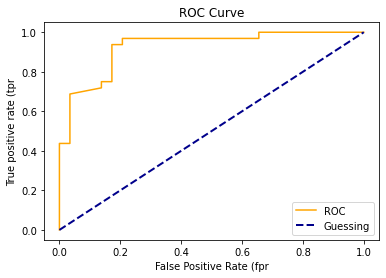

In [98]:
# Create a function for plotting ROC curves

import matplotlib.pyplot as plt

def  plot_roc_curve(fpr, tpr, label=None):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model
    """
    plt.plot(fpr, tpr, color="orange", label=label)
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], linestyle='--', linewidth=2, color='darkblue', label='Guessing')

    # Customize the plot
    plt.xlabel("False Positive Rate (fpr")
    plt.ylabel("True positive rate (tpr")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr, "ROC")

In [99]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_probs_positive)

0.9251077586206896

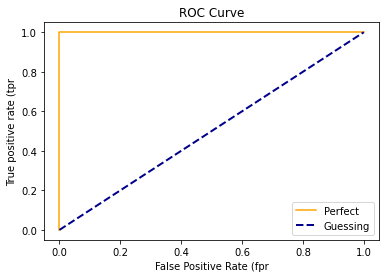

In [100]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr, "Perfect")

#### Confusion matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused


In [101]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]])

In [102]:
# Visualize  confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=["Actual Label"], colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,24,5
1,4,28


<AxesSubplot:>

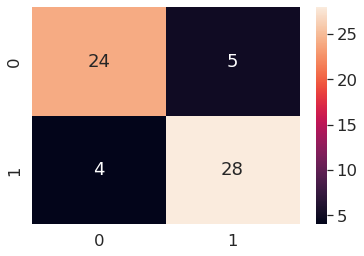

In [103]:
# Make our confusion matrix more visual with Seaborn's heatmap
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)


# Create a heatmap of the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt="d")

### Creating a confusion matrix using Scikit-Learn

To use the new methos of creating a confusion matrix, we need sklear version 1.0+

In [104]:
import sklearn

sklearn.__version__

'1.0.2'

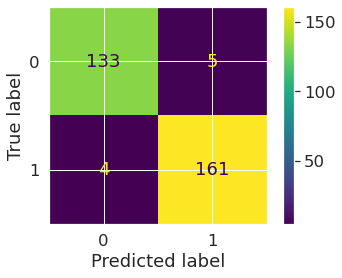

In [105]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

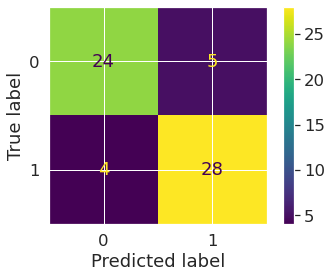

In [106]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds);

### Classification Report

In [107]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [108]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0
pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

/home/nicolas/Develop/Trainning/ZTM/ML-DS/sample_project/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nicolas/Develop/Trainning/ZTM/ML-DS/sample_project/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nicolas/Develop/Trainning/ZTM/ML-DS/sample_project/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:
* **Accuracy** is a good measure to start with if all classes are balanced (e. g. same amount of samples in each class)
* **Precision** and **Recall** become important when classes are imabalanced
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall


### 4.2.2 Regression model evaluation metrics

Model evaluation metrics for regression models:

1. R² (coefficient of determination)
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [109]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [110]:
model.score(X_test, y_test)

0.8051230593157366

In [111]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [112]:
y_test.mean()

2.0550030959302275

In [113]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [114]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [115]:
r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

In [116]:
r2_score(y_true=y_test, y_pred=y_test)

1.0

In [117]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(y_true=y_test, y_pred=y_test_mean)


0.9027197890329222

In [118]:
mean_squared_error(y_true=y_test, y_pred=y_test_mean)

1.3104089782408996

** Mean absolute error (MAE) ** is the average of the absolute values of the errors.

MAE is the average of the absolute differences between the predicted values and the true values.

It gives you an idea of how wrong your models predictions are.

In [119]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_true=y_test, y_pred=y_preds)
mae

0.32754256845930246

In [120]:
df = pd.DataFrame({"actual values": y_test, "predicted_values": y_preds})
df["difference"] = df["actual values"] - df["predicted_values"]
df.head(10)

,actual values,predicted_values,difference
20046,0.47700,0.509500,-0.032500
3024,0.45800,0.741610,-0.283610
15663,5.00001,4.923257,0.076753
20484,2.18600,2.529610,-0.343610
9814,2.78000,2.273690,0.506310
13311,1.58700,1.646920,-0.059920
7113,1.98200,2.376050,-0.394050
7668,1.57500,1.669320,-0.094320
18246,3.40000,2.772971,0.627029
5723,4.46600,4.913459,-0.447459


In [121]:
df["difference"].abs().mean()

0.3275425684593016

**Mean squared error (MSE)** is the average of the squared differences between the predicted values and the true values.

In [122]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_true=y_test, y_pred=y_preds)
mse

0.2553684927247781

In [123]:
df["squared differences"] = np.square(df["difference"])

In [124]:
df.head(10)

,actual values,predicted_values,difference,squared differences
20046,0.47700,0.509500,-0.032500,0.001056
3024,0.45800,0.741610,-0.283610,0.080435
15663,5.00001,4.923257,0.076753,0.005891
20484,2.18600,2.529610,-0.343610,0.118068
9814,2.78000,2.273690,0.506310,0.256350
13311,1.58700,1.646920,-0.059920,0.003590
7113,1.98200,2.376050,-0.394050,0.155275
7668,1.57500,1.669320,-0.094320,0.008896
18246,3.40000,2.772971,0.627029,0.393166
5723,4.46600,4.913459,-0.447459,0.200219


In [125]:
# Calculate MSE by hand
squared = np.square(df["difference"])
squared.mean()

0.255368492724778

### 4.2.3 Finally using the `scoring` parameter

In [126]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Cross validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) # if scoring=None, estimator's default scorer is used
cv_acc

array([0.81967213, 0.8852459 , 0.83606557, 0.85      , 0.8       ])

In [127]:
print(f"Cross validation accuracy: {cv_acc.mean()*100:.2f}%")

Cross validation accuracy: 83.82%


In [128]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.8852459 , 0.83606557, 0.85      , 0.8       ])

In [129]:
print(f"Cross validation accuracy: {cv_acc.mean()*100:.2f}%")

Cross validation accuracy: 83.82%


In [130]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.90625   , 0.84848485, 0.875     , 0.78378378])

In [131]:
# Cross-validated precision
print(f"Cross validation precision: {cv_precision.mean()*100:.2f}%")

Cross validation precision: 84.74%


In [132]:
# Recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.84848485, 0.87878788])

In [133]:
# Cross-validated recall
print(f"Cross validation recall: {cv_recall.mean()*100:.2f}%")

Cross validation recall: 86.06%


Let's see the `scoring` parameter being using a regression model

In [134]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)


In [135]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring="r2")
cv_r2

array([0.62159677, 0.72076221, 0.62136792])

In [136]:
np.mean(cv_r2)

0.6545756342466266

In [137]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error")
np.mean(cv_mae)


-0.48487437131782957

In [138]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.461228671470042

In [139]:
cv_mse

array([-0.51324679, -0.32925916, -0.54118007])

In [140]:
cv_mae

array([-0.52261147, -0.42493192, -0.50707973])

## 4.3 Using different evaluation metrics as Scikit-Learn functions

The 3rd way to evaluate Scikit-Learn models/estimators is to use the `metrics` functions.

In [141]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit model
clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)

# Evaluate model using evaluation functions
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)*100:.2f}%")
print(f"Recall: {recall_score(y_test, y_preds)*100:.2f}%")
print(f"F1 score: {f1_score(y_test, y_preds)*100:.2f}%")

Accuracy: 83.61%
Precision: 83.33%
Recall: 83.33%
F1 score: 83.33%


In [142]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Create X & y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit model
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
print(f"R2 score: {r2_score(y_test, y_preds)*100:.2f}%")
print(f"Mean absolute error: {mean_absolute_error(y_test, y_preds)}")
print(f"Mean squared error: {mean_squared_error(y_test, y_preds)}")

R2 score: 81.09%
Mean absolute error: 0.3220583752664731
Mean squared error: 0.25374356458722314


## 5. Improving a model

First predictions = baseline predictions.

First model = baseline model.

From a data persective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model?
* Could we improve the current model?

Parameters vs Hyperparameters
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

In [143]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1  Tunnig Hyperparameters by hand

Let's make 3 sets, training, validation and test

In [144]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're giubt ti trt abd adhyst:

* `max_depth`: the maximum depth of the tree
* `max_features`: the number of features to consider when looking for the best split
* `min_samples_leaf`: the minimum number of samples required to be at a leaf node
* `min_samples_split`: the minimum number of samples required to split an internal node
* `n_estimators`: the number of trees in the forest

In [145]:
def evaluate_preds(y_true, y_preds):
    """
    Evaluate the model using the metrics:
    Accuracy, Precision, Recall, F1-score
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2), 
                   "precision": round(precision,2), 
                   "recall": round(recall,2), 
                   "f1-score": round(f1, 2)}
    
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Precision: {precision*100:.2f}%")
    print(f"Recall: {recall*100:.2f}%")
    print(f"F1-score: {f1*100:.2f}%")
    
    return metric_dict

In [146]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of the data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 85% of the data

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)


(212, 45, 46)

In [147]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy: 82.22%
Precision: 84.00%
Recall: 84.00%
F1-score: 84.00%


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1-score': 0.84}

### 5.2 Hyperparameter tuning with RandomizedSearchCV



In [148]:
from sklearn.model_selection import RandomizedSearchCV

grid = {
    "n_estimators": [10, 100, 200, 500, 1000, 1200],
    "max_depth": [None, 15, 10, 20, 30],
    "max_features": ["auto", "sqrt"],
    "min_samples_split": [2, 5, 6],
    "min_samples_leaf": [1, 2, 4],
}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"] 

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf, 
                            param_distributions=grid, 
                            n_iter=10, # Number iterations to try with different parameter combinations
                            cv=5, 
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 15, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [149]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [150]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)


Accuracy: 81.97%
Precision: 77.42%
Recall: 85.71%
F1-score: 81.36%


### 5.3 Hyperparameter tuning with GridSearchCV

In [151]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 15, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 5, 6],
 'min_samples_leaf': [1, 2, 4]}

In [153]:
6*5*2*3*3*5

2700

In [154]:
# Reduce the grid search to only the best parameters
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]
}

In [156]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)
# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"] 

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
gs_clf = GridSearchCV(estimator=clf, 
                      param_grid=grid_2,                       
                      cv=5, 
                      verbose=2)

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train);


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [157]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [158]:
# Make predictions with the best hyperparameters
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 78.69%
Precision: 74.19%
Recall: 82.14%
F1-score: 77.97%


Let's compare our different models metrics

<AxesSubplot:>

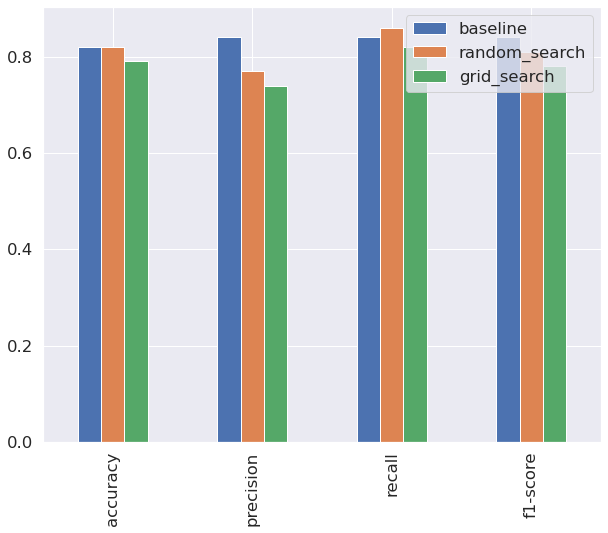

In [159]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "random_search": rs_metrics,
                                "grid_search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8))

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With pickle module
2. With joblib module

In [160]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [161]:
# Load a saved model
loaded_picke_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))


In [162]:
# Make some predictions
pickle_y_preds = loaded_picke_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Accuracy: 78.69%
Precision: 74.19%
Recall: 82.14%
F1-score: 77.97%


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1-score': 0.78}

**Joblib**

In [163]:
from joblib import dump, load
# Save model to file

dump(gs_clf, "gs_random_forest_model_2.joblib")

['gs_random_forest_model_2.joblib']

In [164]:
# Import a saved joblib model
loaded_job_model = load(filename="gs_random_forest_model_2.joblib")

In [165]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_job_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Accuracy: 78.69%
Precision: 74.19%
Recall: 82.14%
F1-score: 77.97%


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1-score': 0.78}

## 7. Putting it all together

In [166]:
data = pd.read_csv("../data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [167]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [168]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [172]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and rop rows with missing labels
data = pd.read_csv("../data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

door_features = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numerical_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_features),
        ("num", numeric_transformer, numerical_features)])

# Creating a preprocessing and modelling pipeline
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", RandomForestRegressor(n_estimators=100))
])

# Split the data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` to find the best parameters for a model with our `Pipeline`

In [173]:
# Use GridSearchCV to find the best hyperparameters
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"], # lo que hay entre los dobles underscore son los nombres de los pasos
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [174]:
gs_model.score(X_test, y_test)

0.3339554263158365